### Using K-Means
Cluster the songs based on their popularity features using K-Means. 
K-Means groups songs based on the similarity in their popularity across these platforms. Songs that have similar streams, chart ranks, and playlist appearances are grouped together.
- Analyze how each cluster performs on these platforms and identify any patterns. 

In [153]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bokeh.io import export_png

In [154]:
# Load the data into a Pandas DataFrame
spotify_df = pd.read_csv(
    "Resources/cleaned_spotify_2023.csv")

# Display sample data
spotify_df.head(10)

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,seven feat latto explicit ver,latto jung kook,2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,lala,myke towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,olivia rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,cruel summer,taylor swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,where she goes,bad bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
5,sprinter,dave central cee,2,2023,6,2186,91,183706234,67,213,...,141,C#,Major,92,66,58,19,0,8,24
6,ella baila sola,eslabon armado peso pluma,2,2023,3,3090,50,725980112,34,222,...,148,F,Minor,67,83,76,48,0,8,3
7,columbia,quevedo,1,2023,7,714,43,58149378,25,89,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,gunna,1,2023,5,1096,83,95217315,60,210,...,130,C#,Minor,85,22,62,12,0,28,9
9,la bebe remix,peso pluma yng lvcas,2,2023,3,2953,44,553634067,49,110,...,170,D,Minor,81,56,48,21,0,8,33


In [155]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'contributing_artist_count',
       'released_year', 'released_month', 'in_spotify_playlists',
       'spotify_chart_rank', 'streams', 'in_apple_playlists',
       'apple_chart_rank', 'in_deezer_playlists', 'deezer_chart_rank',
       'shazam_chart_rank', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

In [156]:
#drop the unnecessary columns
#we are only focusing on the popularity numbers across different platforms and streaming numbers
df = spotify_df.drop(columns=['track_name','released_year','released_month','contributing_artist_count','key','track_name','artist(s)_name','mode','bpm','danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%'], inplace=False)

df.head(10)

,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank
0,553,147,141381703,43,263,45,10,826
1,1474,48,133716286,48,126,58,14,382
2,1397,113,140003974,94,207,91,14,949
3,7858,100,800840817,116,207,125,12,548
4,3133,50,303236322,84,133,87,15,425
5,2186,91,183706234,67,213,88,17,946
6,3090,50,725980112,34,222,43,13,418
7,714,43,58149378,25,89,30,13,194
8,1096,83,95217315,60,210,48,11,953
9,2953,44,553634067,49,110,66,13,339


In [158]:
#rename the artist(s)_name column to artists_name
spotify_df.rename(columns={'artist(s)_name':'artists_name'}, inplace=True)
spotify_df.head()

,track_name,artists_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,seven feat latto explicit ver,latto jung kook,2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,lala,myke towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,olivia rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,cruel summer,taylor swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,where she goes,bad bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


### Preprocessing our data

In [159]:
from sklearn.preprocessing import MinMaxScaler
#  Scale the data from the CSV file
#spotify_scaled = MinMaxScaler().fit_transform(spotify_df[['contributing_artist_count','in_spotify_playlists','spotify_chart_rank','streams','apple_chart_rank','in_deezer_playlists',
 #                                                           'deezer_chart_rank','shazam_chart_rank','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%',
  #                                                          'liveness_%','speechiness_%']])
  # Normalize the features using StandardScaler
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(df)


#display 5 rows of data
spotify_scaled[:5]

array([[-5.55414064e-01,  7.27055137e+00, -6.25603476e-01,
        -2.29194546e-01,  4.31017051e+00, -2.71382276e-01,
         1.39946967e+00,  6.03226964e+00],
       [-4.36366252e-01,  1.94976450e+00, -6.40267302e-01,
        -1.62419015e-01,  1.54473451e+00, -1.85447118e-01,
         2.14107287e+00,  2.57440781e+00],
       [-4.46319218e-01,  5.44321042e+00, -6.28239051e-01,
         4.51915871e-01,  3.17977331e+00,  3.26959774e-02,
         2.14107287e+00,  6.99019082e+00],
       [ 3.88825095e-01,  4.74452124e+00,  6.35931794e-01,
         7.45728208e-01,  3.17977331e+00,  2.57449469e-01,
         1.77027127e+00,  3.86721201e+00],
       [-2.21925080e-01,  2.05725514e+00, -3.15978048e-01,
         3.18364809e-01,  1.68603416e+00,  6.25439014e-03,
         2.32647367e+00,  2.90929083e+00]])

In [160]:
#converting the scaled data into a dataframe
spotify_scaled_df = pd.DataFrame(spotify_scaled, columns=df.columns)

spotify_scaled_df.head()

,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank
0,-0.555414,7.270551,-0.625603,-0.229195,4.310171,-0.271382,1.399470,6.032270
1,-0.436366,1.949764,-0.640267,-0.162419,1.544735,-0.185447,2.141073,2.574408
2,-0.446319,5.443210,-0.628239,0.451916,3.179773,0.032696,2.141073,6.990191
3,0.388825,4.744521,0.635932,0.745728,3.179773,0.257449,1.770271,3.867212
4,-0.221925,2.057255,-0.315978,0.318365,1.686034,0.006254,2.326474,2.909291


#### Find the Best Value for K using the Original Scaled DataFrame

In [161]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [162]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `spotify_scaled_df`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i)
    k_model.fit(spotify_scaled_df)
    inertia.append(k_model.inertia_)

In [163]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

elbow_df.head(10)

,k,inertia
0,1,6536.000000
1,2,4611.083702
2,3,3717.623694
3,4,3189.040809
4,5,2888.345371
5,6,2604.114828
6,7,2347.936579
7,8,2268.431400
8,9,2102.643356
9,10,2006.688781


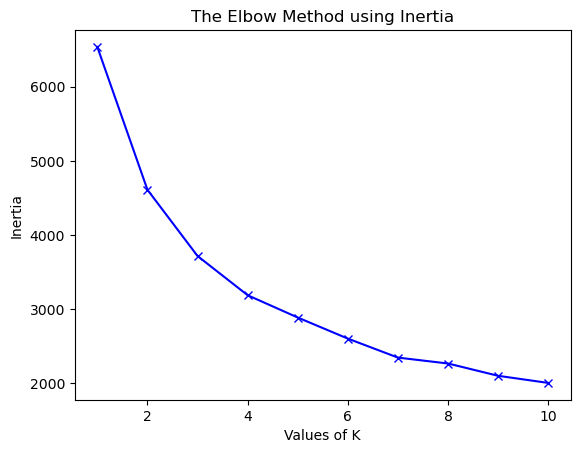

In [164]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# elbow_df.hvplot.line(
    # x="k",
    # y="inertia",
    # title="Elbow Curve",
    # xticks =k
# )
plt.plot(k, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


### Cluster Artists based on  the stream values (higher or lower average) to analyze the popularity

In [165]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

# Fit the K-Means model using the scaled DataFrame
model.fit(spotify_scaled_df)

# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = model.predict(spotify_scaled_df)

# Print the resulting array of cluster values.
print(clusters)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0
 1 1 2 1 0 2 1 1 1 1 1 1 2 1 2 1 1 0 2 1 2 2 2 1 1 0 2 1 1 2 0 2 2 2 0 1 1
 1 2 1 2 2 2 2 1 2 1 1 1 0 1 1 1 1 2 1 2 1 1 0 2 2 2 0 0 1 2 1 2 2 1 2 1 2
 0 0 2 2 2 1 1 1 2 0 2 0 2 2 0 2 1 1 2 2 2 2 2 2 0 2 0 2 0 0 0 0 0 2 0 0 2
 2 0 0 0 0 2 0 2 0 0 0 1 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 2 2 2 2 2 2 2 1 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 1 0
 2 2 2 2 2 2 1 2 2 2 2 0 2 1 2 2 1 2 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 1 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0
 2 2 2 0 0 2 0 2 2 0 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 0
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 0 2 

In [166]:
# Create a copy of the scaled DataFrame
spotify_scaled_df_predictions = spotify_scaled_df.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
spotify_scaled_df_predictions["Cluster"] = clusters

# Display the copy of the scaled DataFrame
spotify_scaled_df_predictions.head(10)


,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank,Cluster
0,-0.555414,7.270551,-0.625603,-0.229195,4.310171,-0.271382,1.399470,6.032270,1
1,-0.436366,1.949764,-0.640267,-0.162419,1.544735,-0.185447,2.141073,2.574408,1
2,-0.446319,5.443210,-0.628239,0.451916,3.179773,0.032696,2.141073,6.990191,1
3,0.388825,4.744521,0.635932,0.745728,3.179773,0.257449,1.770271,3.867212,1
4,-0.221925,2.057255,-0.315978,0.318365,1.686034,0.006254,2.326474,2.909291,1
5,-0.344334,4.260813,-0.544637,0.091328,3.300887,0.012865,2.697275,6.966827,1
6,-0.227483,2.057255,0.492724,-0.349391,3.482558,-0.284603,1.955672,2.854775,1
7,-0.534603,1.681038,-0.784826,-0.469586,0.797865,-0.370538,1.955672,1.110268,1
8,-0.485226,3.830851,-0.713915,-0.002158,3.240330,-0.251551,1.584870,7.021343,1
9,-0.245192,1.734783,0.163029,-0.149064,1.221764,-0.132564,1.955672,2.239525,1


In [168]:
#grouping the songs by cluster and calculate the average value for each of metrics

cluster_summary = spotify_scaled_df_predictions.groupby('Cluster').agg({
    'in_spotify_playlists':'mean',
    'spotify_chart_rank':'mean',
    'streams':'mean',
    'in_apple_playlists':'mean',
    'apple_chart_rank':'mean',
    'in_deezer_playlists':'mean',
    'deezer_chart_rank':'mean',
    'shazam_chart_rank':'mean'
}).reset_index()

cluster_summary

,Cluster,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank
0,0,1.744580,0.102159,1.773181,1.606476,0.483829,1.231779,0.139656,-0.082058
1,1,-0.021437,1.797486,0.045464,0.305010,1.338252,0.101967,1.648602,1.727871
2,2,-0.351888,-0.308885,-0.368435,-0.376078,-0.313021,-0.267222,-0.292661,-0.260208


In [169]:
# Identify the clusters where songs perform well across multiple platforms
# For example, where streams are high and chart ranks are also high (lower numbers in rank columns)

popular_across_platforms = cluster_summary[(cluster_summary['streams'] > cluster_summary['streams'].mean()) & 
                                           (cluster_summary['spotify_chart_rank']<cluster_summary['spotify_chart_rank'].mean())&
                                           (cluster_summary['apple_chart_rank'] < cluster_summary['apple_chart_rank'].mean()) & 
                                           (cluster_summary['shazam_chart_rank'] < cluster_summary['shazam_chart_rank'].mean())]

print("Clusters with high popularity across platforms:")
popular_across_platforms


Clusters with high popularity across platforms:


,Cluster,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank
0,0,1.74458,0.102159,1.773181,1.606476,0.483829,1.231779,0.139656,-0.082058


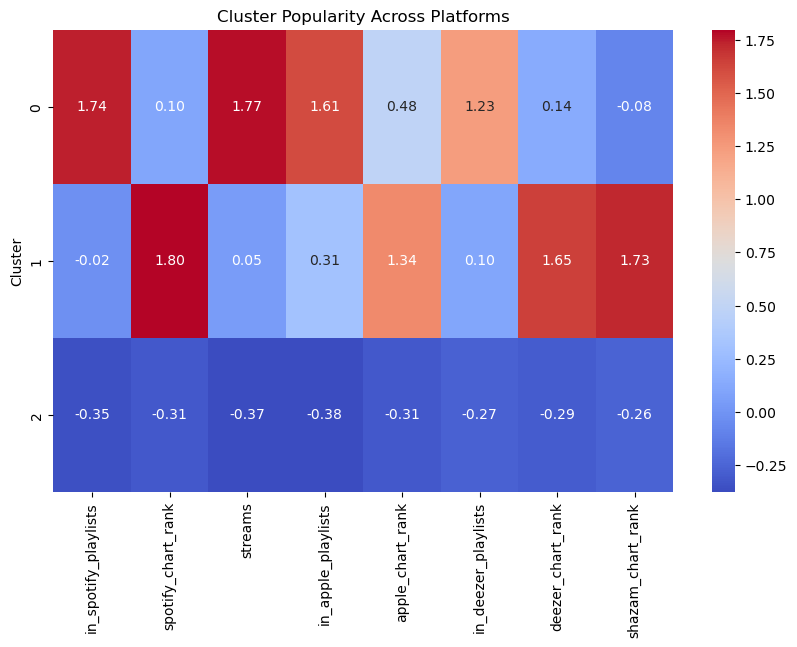

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the cluster summary with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.set_index('Cluster'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Popularity Across Platforms')
plt.show()


In [175]:
#identifying songs in each cluster
#Adding cluster in our original dataframe that has the track and artist_name
spotify_df['cluster'] = clusters

# Group by cluster and count the number of songs in each cluster
cluster_counts = spotify_df.groupby('cluster').size().reset_index(name='song_count')
print(cluster_counts)


   cluster  song_count
0        0         122
1        1          96
2        2         599


In [181]:
#For Noah's Random Forest on KMeans Clusters
spotify_df.to_csv('Resources/KmeansCluster_spotify.csv', index=False)

In [176]:
#viewing songs in cluster 0 
cluster_0_songs = spotify_df[spotify_df['cluster']==0]
print(cluster_0_songs[['track_name','artists_name']])

                                    track_name          artists_name
32                                 blank space          taylor swift
36   sunflower  spiderman into the spiderverse  post malone swae lee
41                                     starboy  the weeknd daft punk
54                                      yellow         chris molitor
62                                viva la vida              coldplay
..                                         ...                   ...
737                              break my soul                beyonc
745                         sweet child o mine          guns n roses
770                                    bound 2            kanye west
777                              the scientist              coldplay
778                                     sparks              coldplay

[122 rows x 2 columns]


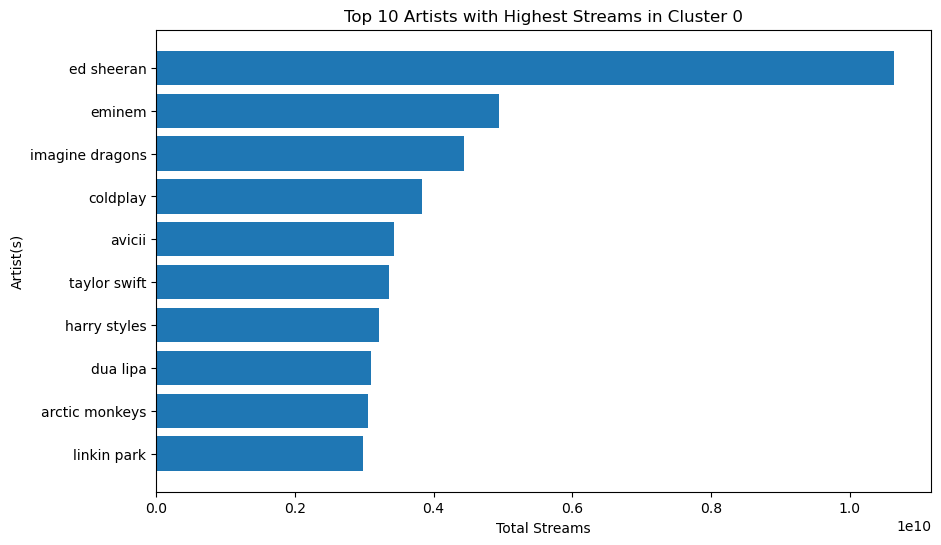

In [178]:
#List of top-10 artists with highest streaming numbers on cluster 0 ( Hits cluster)

artist_streams = cluster_0_songs.groupby('artists_name')['streams'].sum().reset_index()

# Sort by streams in descending order and get the top 10 artists
top_10_artists = artist_streams.sort_values(by='streams', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar chart of the top 10 artists with the highest streams in Cluster 0
plt.barh(top_10_artists['artists_name'], top_10_artists['streams'])

# Invert y-axis so that the artist with the highest streams is on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Total Streams')
plt.ylabel('Artist(s)')
plt.title('Top 10 Artists with Highest Streams in Cluster 0')

# Display the plot
plt.show()

### Summary
The primary objective of this analysis was to group songs based on their popularity metrics across different streaming platforms (Spotify, Apple Music, Shazam) and derive insights into how certain songs or artists perform across these platforms. Using features such as spotify_chart_rank, streams, apple_chart_rank, and shazam_chart_rank, the analysis aimed to identify clusters of songs with similar popularity patterns and provide insights into cross-platform performance.

### Results
- After applying K-Means, each song was assigned to a specific cluster based on its similarity to other songs in terms of popularity.
- One key cluster of interest, Cluster 0, was identified as containing songs with varying levels of streams and chart rankings across platforms.
- This indicates that these songs are universally popular, regardless of the platform.
- By filtering songs in Cluster 0 and summing the total streams for each artist, the top 10 artists with the highest streams were identified. These artists represent those who have consistently performed well in terms of streams within this cluster.

### Future Action Insights
To dig deeper into why certain songs become hits, you can use additional machine learning algorithms that provide actionable insights into song popularity and potential success. These algorithms could help identify patterns, factors, and predictions for future success such as Decision Trees and Random Forest.
- Why Use It?: Decision trees can help you understand the most important factors (features) that contribute to a song becoming a hit. Random Forest, an ensemble method, improves prediction accuracy by combining multiple decision trees.
- Actionable Insights: By analyzing the feature importance, you can see which attributes (e.g., streams, spotify_chart_rank, danceability_%, etc.) are most influential in determining song popularity. This could inform marketing strategies or song production adjustments.
Next Step: Use the dataset to build a Random Forest model to classify songs as hits or non-hits, then analyze feature importance to understand which factors drive hits.
